<a href="https://colab.research.google.com/github/DianaCarolinaCabrera/Thesis_UNAL/blob/main/Models_Baseline_bow_L1_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pwd

'/content'

In [2]:
cd /content/drive/MyDrive/Tesis_Maestria/Experiment_BOW_L1_L2_QMKDC_QMKDCSGD

/content/drive/MyDrive/Tesis_Maestria/Experiment_BOW_L1_L2_QMKDC_QMKDCSGD


#Model Baseline BOW 

#Explore data

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as ex
import plotly.graph_objs as go
from wordcloud import WordCloud,STOPWORDS
stopwords = list(STOPWORDS)
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



In [ ]:
t_data = pd.read_csv('/content/drive/MyDrive/Tesis_Maestria/Experiment_BOW_L1_L2_QMKDC_QMKDCSGD/Dataset/tripadvisor_hotel_reviews.csv')

In [ ]:
t_data.shape

(20491, 2)

In [ ]:
t_data.head(6)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
5,love monaco staff husband stayed hotel crazy w...,5


In [ ]:
t_data['Rating'] = t_data['Rating']-1

In [ ]:
t_data['Rating'].value_counts()

4    9054
3    6039
2    2184
1    1793
0    1421
Name: Rating, dtype: int64

In [ ]:
t_data.describe()

,Rating
count,20491.000000
mean,2.952223
std,1.233030
min,0.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,4.000000


In [ ]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


#Preprocessing

In [ ]:
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import time

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
import string
punc=string.punctuation

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
def pre_processing_bow():
    corpus = []
    for i in range(0,20491):
      review = re.sub('[^a-zA-Z]', ' ' , t_data['Review'][i])
      review = review.lower()
      review = review.split()
      review = [stemmer.stem(word) for word in review if not word in stopwords.words('english')]
      review = ' '.join(review)
      corpus.append(review)
    return corpus

In [ ]:
corpus = pre_processing_bow()

In [ ]:
y_bow = t_data['Rating']
print('X', len(corpus))
print('y', y_bow.shape)

X 20491
y (20491,)


###BOW Representation

In [ ]:
def my_bow(X):

  """
      X: Corpus pre_processing'
  """
  vect = CountVectorizer(max_features = 1000)
  X_vectors = vect.fit_transform(X).toarray() 
  return X_vectors


In [ ]:
X_vectors_bow = my_bow(corpus)

In [ ]:
print('X_vectors', X_vectors_bow)

X_vectors [[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 2 0 ... 3 0 1]
 [0 0 0 ... 0 0 0]]


###Normalizer L1 Columns

In [ ]:
from sklearn import preprocessing

normalizer = preprocessing.Normalizer()
X_vectors_bow = normalizer.fit_transform(X_vectors_bow, 'l1')

In [ ]:
print(X_vectors_bow.shape)

(20491, 1000)


In [ ]:
X_vectors_bow

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.04794633, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.05488213, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.03678559, 0.        , ..., 0.05517839, 0.        ,
        0.0183928 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

###Normalizer L2 Euclidiana

In [ ]:
from sklearn import preprocessing

normalizer = preprocessing.Normalizer()
X_vectors_bow = normalizer.fit_transform(X_vectors_bow, 'l2')

In [ ]:
print(X_vectors_bow.shape)

(20491, 1000)


In [ ]:
X_vectors_bow

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.04794633, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.05488213, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.03678559, 0.        , ..., 0.05517839, 0.        ,
        0.0183928 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

###SMOTE Technique: Classes are imbalanced

In [ ]:
from imblearn.over_sampling import SMOTE
# transform the dataset SMOTE to over sample and balance classes 
X_bow, y_bow = SMOTE().fit_resample(X_vectors_bow, y_bow)
print('X shape', X_bow.shape)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing i

X shape (45270, 1000)


In [ ]:
print('X_bow', X_bow.shape)
print('y_bow', y_bow.shape)

X_bow (45270, 1000)
y_bow (45270,)


#Train_test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(X_bow, y_bow, test_size = 0.2 , random_state = 1)

In [ ]:
print('X_train_bow', X_train_bow.shape)
print('X_test_bow', X_test_bow.shape)
print('Y_train_bow', y_train_bow.shape)
print('Y_test_bow', y_test_bow.shape)

X_train_bow (36216, 1000)
X_test_bow (9054, 1000)
Y_train_bow (36216,)
Y_test_bow (9054,)


In [ ]:
from numpy import savetxt

savetxt('/content/drive/MyDrive/Tesis_Maestria/Experiment_BOW_L1_L2_QMKDC_QMKDCSGD/Dataset/X_train.csv', X_train_bow, delimiter=',')
savetxt('/content/drive/MyDrive/Tesis_Maestria/Experiment_BOW_L1_L2_QMKDC_QMKDCSGD/Dataset/X_test.csv', X_test_bow, delimiter=',')
savetxt('/content/drive/MyDrive/Tesis_Maestria/Experiment_BOW_L1_L2_QMKDC_QMKDCSGD/Dataset/y_train.csv', y_train_bow, delimiter=',')
savetxt('/content/drive/MyDrive/Tesis_Maestria/Experiment_BOW_L1_L2_QMKDC_QMKDCSGD/Dataset/y_test.csv', y_test_bow, delimiter=',')

#Metrics

In [ ]:
def evaluation_metric(y_test, y_hat, model_name):
    
    accuracy = accuracy_score(y_hat, y_test)
    print("Model: ", model_name)
    print("\nAccuracy: ", accuracy)
    print(classification_report(y_hat, y_test))
    
    plt.figure(figsize=(10,6))
    sns.heatmap(confusion_matrix(y_hat, y_test), annot=True, fmt=".2f")
    plt.show()
    return accuracy

#Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report,confusion_matrix

###XGBoost Classifier

In [ ]:
#xgb_model_w2v = XGBClassifier(max_depth=10,random_state=1,learning_rate=0.05,seed=1)
xgb_model = XGBClassifier(silent = True, booster = 'gbtree', learning_rate = 0.1, n_estimators = 1000, max_depth = 5, min_child_weigth = 1, gamma = 0, subsample = 0.8, colsample_bytree= 0.8, objective = 'binary:logistic', nthread = 4, scale_pos_weight = 1, seed = 27)
xgb_model.fit(X_train_bow, y_train_bow)
y_pred = xgb_model.predict(X_test_bow)

Model:  XGB Classifier

Accuracy:  0.8481334216920698
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1765
           1       0.94      0.93      0.93      1822
           2       0.90      0.88      0.89      1830
           3       0.72      0.67      0.69      1811
           4       0.72      0.79      0.75      1826

    accuracy                           0.85      9054
   macro avg       0.85      0.85      0.85      9054
weighted avg       0.85      0.85      0.85      9054



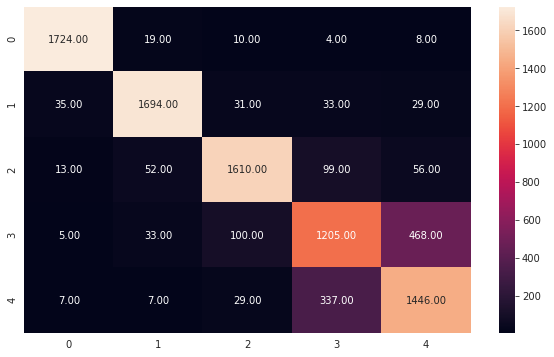

0.85

In [ ]:
xgb_accuracy = evaluation_metric(y_pred, y_test_bow, "XGB Classifier")
f1_xgb = f1_score(y_test_bow, y_pred, average='micro')
f1_xgb = round(f1_xgb, 2)
f1_xgb

###LGBM CLassifier

In [ ]:
#lgb_model_W2V = LGBMClassifier()
lgb_model = LGBMClassifier(objective = 'multiclass', boosting = 'gbdt', learning_rate = 0.05, max_depth = 8, num_leaves =80, n_estimators = 400, bagging_fraction = 0.8, feature_fraction = 0.9)
lgb_model.fit(X_train_bow, y_train_bow)
lgb_preds = lgb_model.predict(X_test_bow)

Model:  LGBM Classifier

Accuracy:  0.8268168765186658
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1765
           1       0.92      0.90      0.91      1822
           2       0.88      0.86      0.87      1830
           3       0.68      0.64      0.66      1811
           4       0.71      0.77      0.74      1826

    accuracy                           0.83      9054
   macro avg       0.83      0.83      0.83      9054
weighted avg       0.83      0.83      0.83      9054



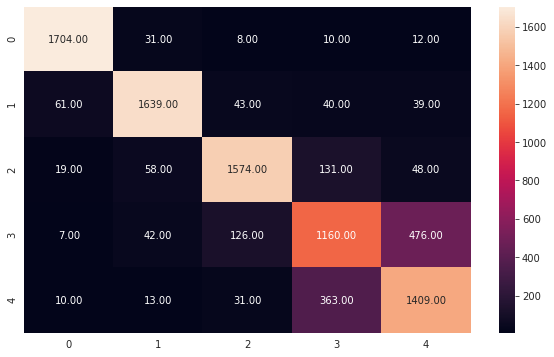

0.83

In [ ]:
lgb_accuracy = evaluation_metric(lgb_preds, y_test_bow, "LGBM Classifier")
f1_lgb = f1_score(y_test_bow, lgb_preds, average='micro')
f1_lgb = round(f1_lgb,2)
f1_lgb

###Random Forest

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_bow, y_train_bow)
rf_preds = rf_model.predict(X_test_bow)

Model:  RF Classifier

Accuracy:  0.8363154406891982
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1765
           1       0.95      0.92      0.94      1822
           2       0.90      0.89      0.90      1830
           3       0.71      0.63      0.66      1811
           4       0.68      0.77      0.72      1826

    accuracy                           0.84      9054
   macro avg       0.84      0.84      0.84      9054
weighted avg       0.84      0.84      0.84      9054



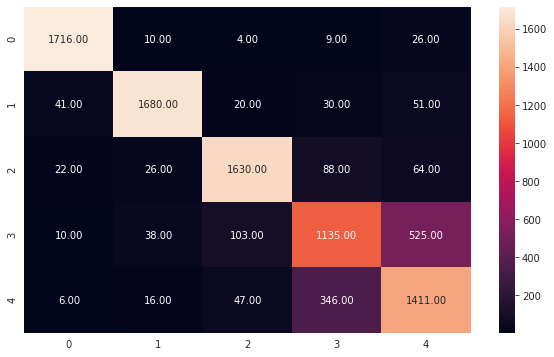

0.84

In [ ]:
rf_accuracy = evaluation_metric(rf_preds, y_test_bow, "RF Classifier")
f1_rf = f1_score(y_test_bow, rf_preds, average='micro')
f1_rf = round(f1_rf, 2)
f1_rf

###Logistic Regression

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train_bow, y_train_bow)
lr_preds = lr_model.predict(X_test_bow)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Model:  LR Classifier

Accuracy:  0.6954937044400266
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1765
           1       0.69      0.69      0.69      1822
           2       0.67      0.66      0.67      1830
           3       0.57      0.52      0.55      1811
           4       0.71      0.74      0.72      1826

    accuracy                           0.70      9054
   macro avg       0.69      0.70      0.69      9054
weighted avg       0.69      0.70      0.69      9054



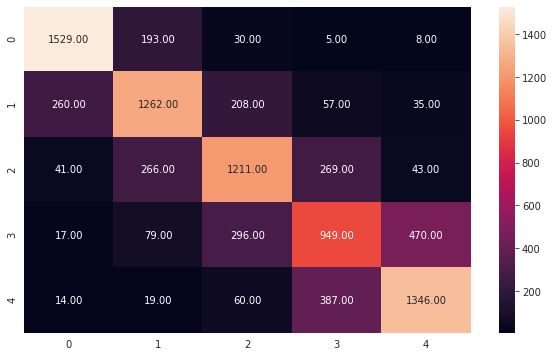

0.7

In [ ]:
lr_accuracy = evaluation_metric(lr_preds, y_test_bow, "LR Classifier")
f1_lr = f1_score(y_test_bow, lr_preds, average='micro')
f1_lr = round(f1_lr, 2)
f1_lr

#QMKDC - QMKDCSGD

In [ ]:
from numpy import loadtxt

X_train = loadtxt('/content/drive/MyDrive/Tesis_Maestria/Experiment_BOW_L1_L2_QMKDC_QMKDCSGD/Dataset/X_train.csv', delimiter=',')
X_test = loadtxt('/content/drive/MyDrive/Tesis_Maestria/Experiment_BOW_L1_L2_QMKDC_QMKDCSGD/Dataset/X_test.csv', delimiter=',')
y_train = loadtxt('/content/drive/MyDrive/Tesis_Maestria/Experiment_BOW_L1_L2_QMKDC_QMKDCSGD/Dataset/y_train.csv', delimiter=',')
y_test = loadtxt('/content/drive/MyDrive/Tesis_Maestria/Experiment_BOW_L1_L2_QMKDC_QMKDCSGD/Dataset/y_test.csv', delimiter=',')

In [ ]:
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('Y_train', y_train.shape)
print('Y_test', y_test.shape)

X_train (36216, 1000)
X_test (9054, 1000)
Y_train (36216,)
Y_test (9054,)


In [ ]:
print('X_train', X_train.dtype)
print('X_test', X_test.dtype)
print('Y_train', y_train.dtype)
print('Y_test', y_test.dtype)

X_train float64
X_test float64
Y_train float64
Y_test float64


##QMKDClassifier BOW

### Clone QMC

In [ ]:
# Install qmc if running in Google Colab

try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
    !rm -R qmc qmc1
    !git clone https://github.com/fagonzalezo/qmc.git
    !mv qmc qmc1
    !mv qmc1/qmc .
else:
    import sys
    sys.path.insert(0, "../")

Cloning into 'qmc'...
remote: Enumerating objects: 215, done.
remote: Counting objects: 100% (215/215), done.
remote: Compressing objects: 100% (151/151), done.
remote: Total 215 (delta 94), reused 162 (delta 62), pack-reused 0
Receiving objects: 100% (215/215), 16.93 MiB | 14.92 MiB/s, done.
Resolving deltas: 100% (94/94), done.


###Libraries

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
import qmc.tf.layers as layers
import qmc.tf.models as models
from time import time
from time import time
import numpy as np
import gc
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8,5)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers as layers2
from tensorflow.keras import Model as ModelTF

###Conversion

In [ ]:
y_train = y_train.astype('int64')
y_test = y_test.astype('int64')

In [ ]:
input_dim = X_train.shape[1]
num_classes = np.unique(y_train).shape[0]
gamma = 0.2
component_dim = 1000
random_state=0
num_eig= 500
batch_size= 256
epochs = 200
lr = 0.005

###QMKDClassifier 

In [ ]:
fm_x = layers.QFeatureMapRFF(input_dim=1000, dim=1000, gamma=0.2, random_state=None)
qmkdc = models.QMKDClassifier(fm_x=fm_x, dim_x=1000 , num_classes=5)
qmkdc.compile()
qmkdc.fit(X_train, y_train, epochs=1)
out = qmkdc.predict(X_test)
y_pred = np.argmax(out, axis = 1).reshape(np.argmax(out, axis = 1).shape[0],1)
Result = accuracy_score(y_test, y_pred)
Acc.append(Result)

print('Accuracy_score', Acc)

1132/1132 [==============================] - 10s 9ms/step
Accuracy_score [0.20532361387232162, 0.20952065385464988, 0.21868787276341947, 0.2675060746631323, 0.22884912745747735, 0.22111773801634638, 0.21957146012812018, 0.20797437596642368, 0.20918930859288712, 0.2132759001546278, 0.2791031588248288, 0.23448199690744423, 0.23205213165451735, 0.22796554009277667, 0.2047713717693837, 0.20587585597525956, 0.21614755908990502, 0.2784404683013033, 0.256129887342611, 0.2468522200132538, 0.24431190633973934, 0.2132759001546278, 0.21912966644576984, 0.22641926220455047, 0.2721449083278109, 0.25745526838966204, 0.25955378838082616, 0.2514910536779324, 0.20808482438701126, 0.20952065385464988, 0.21570576540755468, 0.2914733819306384, 0.28948531036006186, 0.28407333775127014, 0.2772255356748399, 0.2078639275458361, 0.21051468963993814, 0.21714159487519327, 0.3080406450187762, 0.30837199028053897, 0.28120167881599295, 0.2852882703777336, 0.20742213386348576, 0.2094102054340623, 0.2216699801192843,

In [ ]:
dimv = [50, 100, 150, 200, 400, 800, 1000]
gama = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100]
Acc = [] 

for d in dimv:
  for g in gama:
    fm_x = layers.QFeatureMapRFF(input_dim=1000, dim=d, gamma=g, random_state=17)
    qmkdc = models.QMKDClassifier(fm_x=fm_x, dim_x=d , num_classes=4)
    qmkdc.compile()
    qmkdc.fit(X_train, y_train, epochs=1)
    out = qmkdc.predict(X_test)
    y_pred = np.argmax(out, axis = 1).reshape(np.argmax(out, axis = 1).shape[0],1)
    Result = accuracy_score(y_test, y_pred)
    Acc.append(Result)

print('Accuracy_score', Acc)

1132/1132 [==============================] - 8s 7ms/step
Accuracy_score [0.20532361387232162, 0.20952065385464988, 0.21868787276341947, 0.2675060746631323, 0.22884912745747735, 0.22111773801634638, 0.21957146012812018, 0.20797437596642368, 0.20918930859288712, 0.2132759001546278, 0.2791031588248288, 0.23448199690744423, 0.23205213165451735, 0.2278550916721891, 0.2047713717693837, 0.20587585597525956, 0.21614755908990502, 0.2784404683013033, 0.256129887342611, 0.2468522200132538, 0.24431190633973934, 0.2132759001546278, 0.21912966644576984, 0.22641926220455047, 0.2721449083278109, 0.25745526838966204, 0.25955378838082616, 0.2514910536779324, 0.20808482438701126, 0.20952065385464988, 0.21570576540755468, 0.2914733819306384, 0.28948531036006186, 0.28407333775127014, 0.2772255356748399, 0.2078639275458361, 0.21051468963993814, 0.21714159487519327, 0.3080406450187762, 0.30837199028053897, 0.28120167881599295, 0.2852882703777336, 0.20742213386348576, 0.2094102054340623, 0.2216699801192843, 0

In [ ]:
dimv = [50, 100, 150, 200, 400, 800, 1000]
gama = [0.01, 0.02, 0.04, 0.06, 0.08, 0.09, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.2, 1.4, 1.6]
Acc = [] 

for d in dimv:
  for g in gama:
    fm_x = layers.QFeatureMapRFF(input_dim=1000, dim=d, gamma=g, random_state=17)
    qmkdc = models.QMKDClassifier(fm_x=fm_x, dim_x=d , num_classes=4)
    qmkdc.compile()
    qmkdc.fit(X_train, y_train, epochs=1)
    out = qmkdc.predict(X_test)
    y_pred = np.argmax(out, axis = 1).reshape(np.argmax(out, axis = 1).shape[0],1)
    Result = accuracy_score(y_test, y_pred)
    Acc.append(Result)

print('Accuracy_score', Acc)

1132/1132 [==============================] - 8s 7ms/step
Accuracy_score [0.2415506958250497, 0.25480450629555995, 0.2645239673072675, 0.26827921360724544, 0.26662248729843163, 0.26673293571901924, 0.2675060746631323, 0.2577866136514248, 0.25171195051910755, 0.23293571901921803, 0.23415065164568147, 0.2301745085045284, 0.22255356748398497, 0.22200132538104705, 0.22884912745747735, 0.22520432957808703, 0.22288491274574773, 0.22332670642809807, 0.2423238347691628, 0.256129887342611, 0.2686105588690082, 0.27634194831013914, 0.27799867461895295, 0.28009719461011706, 0.2791031588248288, 0.27026728517782195, 0.2618732052131654, 0.2538104705102717, 0.2460790810691407, 0.2499447757897062, 0.24861939474265518, 0.24088800530152418, 0.23448199690744423, 0.23669096531919592, 0.2369118621603711, 0.23746410426330902, 0.2468522200132538, 0.25590899050143584, 0.26573889993373095, 0.27545836094543846, 0.2777777777777778, 0.27899271040424123, 0.2784404683013033, 0.2804285398718798, 0.27081952728075986, 0

In [ ]:
dimv = [200, 400, 500]
gama = [0.2, 1, 2]
Acc = [] 

for d in dimv:
  for g in gama:
    fm_x = layers.QFeatureMapRFF(input_dim=1000, dim=d, gamma=g, random_state=17)
    qmkdc = models.QMKDClassifier(fm_x=fm_x, dim_x=d , num_classes=4)
    qmkdc.compile()
    qmkdc.fit(X_train, y_train, epochs=1)
    out = qmkdc.predict(X_test)
    y_pred = np.argmax(out, axis = 1).reshape(np.argmax(out, axis = 1).shape[0],1)
    Result = accuracy_score(y_test, y_pred)
    Acc.append(Result)

print('Accuracy_score', Acc)

1132/1132 [==============================] - 2s 2ms/step
Accuracy_score [0.28009719461011706, 0.25745526838966204, 0.2591119946984758, 0.3045062955599735, 0.28948531036006186, 0.2772255356748399, 0.3132317207863928, 0.2860614093218467, 0.2844046830130329]


In [ ]:
dimv = [500]
gama = [0.0002, 0.002, 0.02, 0.2]
Acc = [] 

for d in dimv:
  for g in gama:
    fm_x = layers.QFeatureMapRFF(input_dim=1000, dim=d, gamma=g, random_state=17)
    qmkdc = models.QMKDClassifier(fm_x=fm_x, dim_x=d , num_classes=4)
    qmkdc.compile()
    qmkdc.fit(X_train, y_train, epochs=1)
    out = qmkdc.predict(X_test)
    y_pred = np.argmax(out, axis = 1).reshape(np.argmax(out, axis = 1).shape[0],1)
    Result = accuracy_score(y_test, y_pred)
    Acc.append(Result)

print('Accuracy_score', Acc)

1132/1132 [==============================] - 2s 2ms/step
Accuracy_score [0.20764303070466092, 0.21681024961343054, 0.24674177159266622, 0.3132317207863928]


In [ ]:
dimv = [500]
gama = [0.1, 0.2, 0.3, 0.4]
Acc = [] 

for d in dimv:
  for g in gama:
    fm_x = layers.QFeatureMapRFF(input_dim=1000, dim=d, gamma=g, random_state=17)
    qmkdc = models.QMKDClassifier(fm_x=fm_x, dim_x=d , num_classes=4)
    qmkdc.compile()
    qmkdc.fit(X_train, y_train, epochs=1)
    out = qmkdc.predict(X_test)
    y_pred = np.argmax(out, axis = 1).reshape(np.argmax(out, axis = 1).shape[0],1)
    Result = accuracy_score(y_test, y_pred)
    Acc.append(Result)

print('Accuracy_score', Acc)

1132/1132 [==============================] - 2s 2ms/step
Accuracy_score [0.2916942787718136, 0.3132317207863928, 0.31809145129224653, 0.31256903026286725]


In [ ]:
dimv = [1000, 2000, 3000]
gama = [0.01, 0.02, 0.04, 0.06, 0.08, 0.09, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.2, 1.4, 1.6]
Acc = [] 

for d in dimv:
  for g in gama:
    fm_x = layers.QFeatureMapRFF(input_dim=1000, dim=d, gamma=g, random_state=17)
    qmkdc = models.QMKDClassifier(fm_x=fm_x, dim_x=d , num_classes=4)
    qmkdc.compile()
    qmkdc.fit(X_train, y_train, epochs=1)
    out = qmkdc.predict(X_test)
    y_pred = np.argmax(out, axis = 1).reshape(np.argmax(out, axis = 1).shape[0],1)
    Result = accuracy_score(y_test, y_pred)
    Acc.append(Result)

print('Accuracy_score', Acc)

1132/1132 [==============================] - 76s 67ms/step


###QMKDCSGD

### QMKDCSG on differents set of lr

In [ ]:
#Best lr set_lr_best = [0.0005, 0.0025, 0.005]
set_lr_a = [0.005]
set_lr_b = [0.00005, 0.0005, 0.5, 10]
set_lr_c = [0.000005, 0.00005, 1, 10]
set_lr_d = [0.0005, 0.005, 0.05, 0.5, 1, 10]

for lr in set_lr_a:
  exp_time = time()
  qmkdc1_dig = models.QMKDClassifierSGD(input_dim=1000, dim_x=component_dim, num_classes=num_classes, num_eig=num_eig, gamma=0.2, random_state=None)
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
  qmkdc1_dig.compile(optimizer, loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
  y_train_bin = tf.reshape(tf.keras.backend.one_hot(y_train, num_classes), (-1,num_classes))
  y_test_bin = tf.reshape(tf.keras.backend.one_hot(y_test, num_classes), (-1,num_classes))
  qmkdc1_dig.fit(X_train, y_train_bin, epochs=100, verbose=2, validation_data=(X_test, y_test_bin))
  out = qmkdc1_dig.predict(X_test)
  print(f'lr = {lr}')
  print(f'acc = {accuracy_score(y_test, np.argmax(out, axis=1))}')
  print("--------time QMKDCsgd---------------")
  print(time() - exp_time)



Epoch 1/100
1132/1132 - 8s - loss: 0.8779 - accuracy: 0.6452 - val_loss: 0.7417 - val_accuracy: 0.7143
Epoch 2/100
1132/1132 - 8s - loss: 0.5889 - accuracy: 0.7827 - val_loss: 0.5392 - val_accuracy: 0.8049
Epoch 3/100
1132/1132 - 8s - loss: 0.3664 - accuracy: 0.8793 - val_loss: 0.4329 - val_accuracy: 0.8480
Epoch 4/100
1132/1132 - 8s - loss: 0.2365 - accuracy: 0.9319 - val_loss: 0.4071 - val_accuracy: 0.8611
Epoch 5/100
1132/1132 - 8s - loss: 0.1508 - accuracy: 0.9678 - val_loss: 0.3931 - val_accuracy: 0.8772
Epoch 6/100
1132/1132 - 8s - loss: 0.0927 - accuracy: 0.9884 - val_loss: 0.4146 - val_accuracy: 0.8772
Epoch 7/100
1132/1132 - 7s - loss: 0.0562 - accuracy: 0.9974 - val_loss: 0.4173 - val_accuracy: 0.8781
Epoch 8/100
1132/1132 - 7s - loss: 0.0375 - accuracy: 0.9995 - val_loss: 0.4201 - val_accuracy: 0.8819
Epoch 9/100
1132/1132 - 7s - loss: 0.0279 - accuracy: 0.9999 - val_loss: 0.4139 - val_accuracy: 0.8824
Epoch 10/100
1132/1132 - 7s - loss: 0.0229 - accuracy: 0.9999 - val_loss:

KeyboardInterrupt: ignored

In [ ]:
#Best lr set_lr_best = [0.0005, 0.0025, 0.005]
set_lr_a = [0.005]
set_lr_b = [0.00005, 0.0005, 0.5, 10]
set_lr_c = [0.000005, 0.00005, 1, 10]
set_lr_d = [0.0005, 0.005, 0.05, 0.5, 1, 10]

for lr in set_lr_a:
  exp_time = time()
  qmkdc1_dig = models.QMKDClassifierSGD(input_dim=1000, dim_x=component_dim, num_classes=num_classes, num_eig=num_eig, gamma=2**-9, random_state=None)
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
  qmkdc1_dig.compile(optimizer, loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
  y_train_bin = tf.reshape(tf.keras.backend.one_hot(y_train, num_classes), (-1,num_classes))
  y_test_bin = tf.reshape(tf.keras.backend.one_hot(y_test, num_classes), (-1,num_classes))
  qmkdc1_dig.fit(X_train, y_train_bin, epochs=100, verbose=2, validation_data=(X_test, y_test_bin))
  out = qmkdc1_dig.predict(X_test)
  print(f'lr = {lr}')
  print(f'acc = {accuracy_score(y_test, np.argmax(out, axis=1))}')
  print("--------time QMKDCsgd---------------")
  print(time() - exp_time)

Epoch 1/100
1132/1132 - 8s - loss: 0.9207 - accuracy: 0.6257 - val_loss: 0.8338 - val_accuracy: 0.6795
Epoch 2/100
1132/1132 - 7s - loss: 0.7668 - accuracy: 0.7008 - val_loss: 0.7697 - val_accuracy: 0.6933
Epoch 3/100
1132/1132 - 8s - loss: 0.6875 - accuracy: 0.7273 - val_loss: 0.6922 - val_accuracy: 0.7266
Epoch 4/100
1132/1132 - 8s - loss: 0.5902 - accuracy: 0.7655 - val_loss: 0.6233 - val_accuracy: 0.7569
Epoch 5/100
1132/1132 - 7s - loss: 0.5006 - accuracy: 0.8077 - val_loss: 0.5544 - val_accuracy: 0.7926
Epoch 6/100
1132/1132 - 7s - loss: 0.4116 - accuracy: 0.8497 - val_loss: 0.4965 - val_accuracy: 0.8220
Epoch 7/100
1132/1132 - 7s - loss: 0.3410 - accuracy: 0.8817 - val_loss: 0.4663 - val_accuracy: 0.8416
Epoch 8/100
1132/1132 - 7s - loss: 0.2902 - accuracy: 0.9059 - val_loss: 0.4600 - val_accuracy: 0.8488
Epoch 9/100
1132/1132 - 7s - loss: 0.2499 - accuracy: 0.9228 - val_loss: 0.4364 - val_accuracy: 0.8514
Epoch 10/100
1132/1132 - 7s - loss: 0.2154 - accuracy: 0.9379 - val_loss:

In [ ]:
#Best lr set_lr_best = [0.0005, 0.0025, 0.005]
set_lr_a = [0.005]
set_lr_b = [0.00005, 0.0005, 0.5, 10]
set_lr_c = [0.000005, 0.00005, 1, 10]
set_lr_d = [0.0005, 0.005, 0.05, 0.5, 1, 10]

for lr in set_lr_a:
  exp_time = time()
  qmkdc1_dig = models.QMKDClassifierSGD(input_dim=1000, dim_x=component_dim, num_classes=num_classes, num_eig=num_eig, gamma=2**-9, random_state=None)
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
  qmkdc1_dig.compile(optimizer, loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
  y_train_bin = tf.reshape(tf.keras.backend.one_hot(y_train, num_classes), (-1,num_classes))
  y_test_bin = tf.reshape(tf.keras.backend.one_hot(y_test, num_classes), (-1,num_classes))
  qmkdc1_dig.fit(X_train, y_train_bin, epochs=100, verbose=2, validation_data=(X_test, y_test_bin))
  out = qmkdc1_dig.predict(X_test)
  print(f'lr = {lr}')
  print(f'acc = {accuracy_score(y_test, np.argmax(out, axis=1))}')
  print("--------time QMKDCsgd---------------")
  print(time() - exp_time)

Epoch 1/100
1132/1132 - 8s - loss: 0.9278 - accuracy: 0.6240 - val_loss: 0.8300 - val_accuracy: 0.6779
Epoch 2/100
1132/1132 - 8s - loss: 0.7662 - accuracy: 0.7020 - val_loss: 0.7618 - val_accuracy: 0.7043
Epoch 3/100
1132/1132 - 8s - loss: 0.6734 - accuracy: 0.7309 - val_loss: 0.6728 - val_accuracy: 0.7268
Epoch 4/100
1132/1132 - 8s - loss: 0.5751 - accuracy: 0.7742 - val_loss: 0.6059 - val_accuracy: 0.7668
Epoch 5/100
1132/1132 - 8s - loss: 0.4834 - accuracy: 0.8175 - val_loss: 0.5415 - val_accuracy: 0.7964
Epoch 6/100
1132/1132 - 8s - loss: 0.4036 - accuracy: 0.8561 - val_loss: 0.5001 - val_accuracy: 0.8234
Epoch 7/100


KeyboardInterrupt: ignored

In [ ]:
#Best lr set_lr_best = [0.0005, 0.0025, 0.005]
set_lr_a = [0.005]
set_lr_b = [0.00005, 0.0005, 0.5, 10]
set_lr_c = [0.000005, 0.00005, 1, 10]
set_lr_d = [0.0005, 0.005, 0.05, 0.5, 1, 10]

for lr in set_lr_a:
  exp_time = time()
  qmkdc1_dig = models.QMKDClassifierSGD(input_dim=1000, dim_x=component_dim, num_classes=num_classes, num_eig=num_eig, gamma=2**-9, random_state=None)
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
  qmkdc1_dig.compile(optimizer, loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
  y_train_bin = tf.reshape(tf.keras.backend.one_hot(y_train, num_classes), (-1,num_classes))
  y_test_bin = tf.reshape(tf.keras.backend.one_hot(y_test, num_classes), (-1,num_classes))
  qmkdc1_dig.fit(X_train, y_train_bin, epochs=100, verbose=2, validation_data=(X_test, y_test_bin))
  out = qmkdc1_dig.predict(X_test)
  print(f'lr = {lr}')
  print(f'acc = {accuracy_score(y_test, np.argmax(out, axis=1))}')
  print("--------time QMKDCsgd---------------")
  print(time() - exp_time)



Epoch 1/100
1132/1132 - 8s - loss: 0.9232 - accuracy: 0.6236 - val_loss: 0.8163 - val_accuracy: 0.6791
Epoch 2/100
1132/1132 - 7s - loss: 0.7614 - accuracy: 0.6997 - val_loss: 0.7573 - val_accuracy: 0.7012
Epoch 3/100
1132/1132 - 7s - loss: 0.6722 - accuracy: 0.7313 - val_loss: 0.6841 - val_accuracy: 0.7335
Epoch 4/100
1132/1132 - 7s - loss: 0.5745 - accuracy: 0.7739 - val_loss: 0.6078 - val_accuracy: 0.7678
Epoch 5/100
1132/1132 - 7s - loss: 0.4832 - accuracy: 0.8175 - val_loss: 0.5438 - val_accuracy: 0.8028
Epoch 6/100
1132/1132 - 7s - loss: 0.3998 - accuracy: 0.8565 - val_loss: 0.4944 - val_accuracy: 0.8212
Epoch 7/100
1132/1132 - 7s - loss: 0.3384 - accuracy: 0.8830 - val_loss: 0.4738 - val_accuracy: 0.8328
Epoch 8/100
1132/1132 - 7s - loss: 0.2907 - accuracy: 0.9034 - val_loss: 0.4480 - val_accuracy: 0.8435
Epoch 9/100
1132/1132 - 7s - loss: 0.2518 - accuracy: 0.9216 - val_loss: 0.4456 - val_accuracy: 0.8521
Epoch 10/100
1132/1132 - 7s - loss: 0.2201 - accuracy: 0.9355 - val_loss:

In [ ]:
#Best lr set_lr_best = [0.0005, 0.0025, 0.005]
set_lr_a = [0.005, 0.0005, 0.00005, 0.000005, 0.0000005]
set_lr_b = [0.00005, 0.0005, 0.5, 10]
set_lr_c = [0.000005, 0.00005, 1, 10]
set_lr_d = [0.0005, 0.005, 0.05, 0.5, 1, 10]

for lr in set_lr_a:
  exp_time = time()
  qmkdc1_dig = models.QMKDClassifierSGD(input_dim=1000, dim_x=component_dim, num_classes=num_classes, num_eig=num_eig, gamma=0.2, random_state=None)
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
  qmkdc1_dig.compile(optimizer, loss=tf.keras.losses.CategoricalCrossentropy())
  y_train_bin = tf.reshape(tf.keras.backend.one_hot(y_train, num_classes), (-1,num_classes))
  qmkdc1_dig.fit(X_train, y_train_bin, epochs=200)
  out = qmkdc1_dig.predict(X_test)
  print(f'lr = {lr}')
  print(f'acc = {accuracy_score(y_test, np.argmax(out, axis=1))}')
  print("--------time QMKDCsgd---------------")
  print(time() - exp_time)

Epoch 1/200
1132/1132 [==============================] - 7s 6ms/step - loss: 0.8777
Epoch 2/200
1132/1132 [==============================] - 7s 6ms/step - loss: 0.6053
Epoch 3/200
1132/1132 [==============================] - 7s 6ms/step - loss: 0.3810
Epoch 4/200
1132/1132 [==============================] - 7s 6ms/step - loss: 0.2395
Epoch 5/200
1132/1132 [==============================] - 7s 6ms/step - loss: 0.1567
Epoch 6/200
1132/1132 [==============================] - 7s 6ms/step - loss: 0.0961
Epoch 7/200
1132/1132 [==============================] - 7s 6ms/step - loss: 0.0606
Epoch 8/200
1132/1132 [==============================] - 7s 6ms/step - loss: 0.0395
Epoch 9/200
1132/1132 [==============================] - 7s 6ms/step - loss: 0.0292
Epoch 10/200
1132/1132 [==============================] - 7s 6ms/step - loss: 0.0236
Epoch 11/200
1132/1132 [==============================] - 7s 6ms/step - loss: 0.0204
Epoch 12/200
1132/1132 [==============================] - 7s 6ms/step - lo

In [ ]:
#Best lr set_lr_best = [0.0005, 0.0025, 0.005]
set_lr_a = [0.005, 0.0005, 0.00005, 0.000005, 0.0000005]
set_lr_b = [0.0005, 0.005, 0.05, 0.5, 1, 10]

for lr in set_lr_b:
  exp_time = time()
  qmkdc1_dig = models.QMKDClassifierSGD(input_dim=1000, dim_x=component_dim, num_classes=num_classes, num_eig=num_eig, gamma=0.2, random_state=None)
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
  qmkdc1_dig.compile(optimizer, loss=tf.keras.losses.CategoricalCrossentropy())
  y_train_bin = tf.reshape(tf.keras.backend.one_hot(y_train, num_classes), (-1,num_classes))
  qmkdc1_dig.fit(X_train, y_train_bin, epochs=200)
  out = qmkdc1_dig.predict(X_test)
  print(f'lr = {lr}')
  print(f'acc = {accuracy_score(y_test, np.argmax(out, axis=1))}')
  print("--------time QMKDCsgd---------------")
  print(time() - exp_time)

NameError: ignored

In [ ]:
#Best lr set_lr_best = [0.0005, 0.0025, 0.005]
set_eig_a = [1, 5, 10, 20, 25, 100, 250, 500]

for eigr in set_eig_a:
  exp_time = time()
  qmkdc1_dig = models.QMKDClassifierSGD(input_dim=1000, dim_x=500, num_classes=4, num_eig=eigr, gamma=0.2, random_state=None)
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
  qmkdc1_dig.compile(optimizer, loss=tf.keras.losses.CategoricalCrossentropy())
  y_train_bin = tf.reshape(tf.keras.backend.one_hot(y_train, 4), (-1,4))
  qmkdc1_dig.fit(X_train, y_train_bin, epochs=10)
  out = qmkdc1_dig.predict(X_test)
  print(f'eig = {eigr}')
  print(f'acc = {accuracy_score(y_test, np.argmax(out, axis=1))}')
  print("--------time QMKDCsgd---------------")
  print(time() - exp_time)

Epoch 1/10
1132/1132 [==============================] - 4s 4ms/step - loss: 9.5417e-08
Epoch 2/10
1132/1132 [==============================] - 4s 4ms/step - loss: 9.5417e-08
Epoch 3/10
1132/1132 [==============================] - 4s 4ms/step - loss: 9.5417e-08
Epoch 4/10
1132/1132 [==============================] - 4s 4ms/step - loss: 9.5417e-08
Epoch 5/10
1132/1132 [==============================] - 4s 4ms/step - loss: 9.5417e-08
Epoch 6/10
1132/1132 [==============================] - 4s 4ms/step - loss: 9.5417e-08
Epoch 7/10
1132/1132 [==============================] - 4s 4ms/step - loss: 9.5417e-08
Epoch 8/10
1132/1132 [==============================] - 4s 4ms/step - loss: 9.5417e-08
Epoch 9/10
1132/1132 [==============================] - 4s 4ms/step - loss: 9.5417e-08
Epoch 10/10
1132/1132 [==============================] - 4s 4ms/step - loss: 9.5417e-08
eig = 1
acc = 0.1949414623370886
--------time QMKDCsgd---------------
44.52291703224182
Epoch 1/10
1132/1132 [===================

In [ ]:
#Best lr set_lr_best = [0.0005, 0.0025, 0.005]
set_lr_a = [0.005, 0.0005, 0.00005, 0.000005, 0.0000005]
set_lr_b = [0.00005, 0.0005, 0.5, 10]
set_lr_c = [0.000005, 0.00005, 1, 10]
set_lr_d = [0.0005, 0.005, 0.05, 0.5, 1, 10]

for lr in set_lr_d:
  exp_time = time()
  qmkdc1_dig = models.QMKDClassifierSGD(input_dim=1000, dim_x=500, num_classes=4, num_eig=50, gamma=0.2, random_state=None)
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
  qmkdc1_dig.compile(optimizer, loss=tf.keras.losses.CategoricalCrossentropy())
  y_train_bin = tf.reshape(tf.keras.backend.one_hot(y_train, 4), (-1,4))
  qmkdc1_dig.fit(X_train, y_train_bin, epochs=10)
  out = qmkdc1_dig.predict(X_test)
  print(f'lr = {lr}')
  print(f'acc = {accuracy_score(y_test, np.argmax(out, axis=1))}')
  print("--------time QMKDCsgd---------------")
  print(time() - exp_time)

Epoch 1/10
1132/1132 [==============================] - 4s 4ms/step - loss: 1.0515
Epoch 2/10
1132/1132 [==============================] - 5s 4ms/step - loss: 0.8582
Epoch 3/10
1132/1132 [==============================] - 4s 4ms/step - loss: 0.7443
Epoch 4/10
1132/1132 [==============================] - 5s 4ms/step - loss: 0.6521
Epoch 5/10
1132/1132 [==============================] - 4s 4ms/step - loss: 0.5713
Epoch 6/10
1132/1132 [==============================] - 5s 4ms/step - loss: 0.5000
Epoch 7/10
1132/1132 [==============================] - 5s 4ms/step - loss: 0.4426
Epoch 8/10
1132/1132 [==============================] - 5s 4ms/step - loss: 0.3935
Epoch 9/10
1132/1132 [==============================] - 5s 4ms/step - loss: 0.3543
Epoch 10/10
1132/1132 [==============================] - 5s 5ms/step - loss: 0.3210
lr = 0.0005
acc = 0.3600618511155291
--------time QMKDCsgd---------------
48.04964995384216
Epoch 1/10
1132/1132 [==============================] - 5s 4ms/step - loss: 1

In [ ]:
#Best lr set_lr_best = [0.0005, 0.0025, 0.005]
set_lr_a = [0.005, 0.0005, 0.00005, 0.000005, 0.0000005]
set_lr_b = [0.00005, 0.0005, 0.5, 10]
set_lr_c = [0.000005, 0.00005, 1, 10]
set_lr_d = [0.0005, 0.005, 0.05, 0.5, 1, 10]

for lr in set_lr_a:
  exp_time = time()
  qmkdc1_dig = models.QMKDClassifierSGD(input_dim=1000, dim_x=1000, num_classes=4, num_eig=50, gamma=100, random_state=17)
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
  qmkdc1_dig.compile(optimizer, loss=tf.keras.losses.CategoricalCrossentropy())
  y_train_bin = tf.reshape(tf.keras.backend.one_hot(y_train, 4), (-1,4))
  qmkdc1_dig.fit(X_train, y_train_bin, epochs=10)
  out = qmkdc1_dig.predict(X_test)
  print(f'lr = {lr}')
  print(f'acc = {accuracy_score(y_test, np.argmax(out, axis=1))}')
  print("--------time QMKDCsgd---------------")
  print(time() - exp_time)

Epoch 1/10
1132/1132 [==============================] - 5s 4ms/step - loss: 1.1106
Epoch 2/10
1132/1132 [==============================] - 5s 4ms/step - loss: 0.9980
Epoch 3/10
1132/1132 [==============================] - 4s 4ms/step - loss: 0.9507
Epoch 4/10
1132/1132 [==============================] - 4s 4ms/step - loss: 0.9274
Epoch 5/10
1132/1132 [==============================] - 5s 4ms/step - loss: 0.9067
Epoch 6/10
1132/1132 [==============================] - 4s 4ms/step - loss: 0.8922
Epoch 7/10
1132/1132 [==============================] - 4s 4ms/step - loss: 0.8824
Epoch 8/10
1132/1132 [==============================] - 5s 4ms/step - loss: 0.8706
Epoch 9/10
1132/1132 [==============================] - 5s 4ms/step - loss: 0.8634
Epoch 10/10
1132/1132 [==============================] - 4s 4ms/step - loss: 0.8655
lr = 0.005
acc = 0.2696045946542964
--------time QMKDCsgd---------------
46.9223415851593
Epoch 1/10
1132/1132 [==============================] - 4s 4ms/step - loss: 1.1

In [ ]:
set_lr_a = [0.005, 0.0005, 0.00005, 0.000005, 0.0000005]
set_lr_b = [0.00005, 0.0005, 0.005, 0.05, 10]
set_lr_c = [0.000005, 0.00005, 1, 10]
set_lr_d = [0.0005, 0.005, 0.05, 0.5, 1, 10]

for lr in set_lr_b:
  exp_time = time()
  qmkdc1_dig = models.QMKDClassifierSGD(input_dim=1000, dim_x=1000, num_classes=4, num_eig=50, gamma=100, random_state=17)
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
  qmkdc1_dig.compile(optimizer, loss=tf.keras.losses.CategoricalCrossentropy())
  y_train_bin = tf.reshape(tf.keras.backend.one_hot(y_train, 4), (-1,4))
  qmkdc1_dig.fit(X_train, y_train_bin, epochs=10)
  out = qmkdc1_dig.predict(X_test)
  print(f'lr = {lr}')
  print(f'acc = {accuracy_score(y_test, np.argmax(out, axis=1))}')
  print("--------time QMKDCsgd---------------")
  print(time() - exp_time)

Epoch 1/10
1132/1132 [==============================] - 4s 4ms/step - loss: 1.1363
Epoch 2/10
1132/1132 [==============================] - 4s 4ms/step - loss: 1.0888
Epoch 3/10
1132/1132 [==============================] - 4s 4ms/step - loss: 1.0504
Epoch 4/10
1132/1132 [==============================] - 5s 4ms/step - loss: 1.0157
Epoch 5/10
1132/1132 [==============================] - 4s 4ms/step - loss: 0.9834
Epoch 6/10
1132/1132 [==============================] - 5s 4ms/step - loss: 0.9528
Epoch 7/10
1132/1132 [==============================] - 5s 4ms/step - loss: 0.9237
Epoch 8/10
1132/1132 [==============================] - 5s 4ms/step - loss: 0.8957
Epoch 9/10
1132/1132 [==============================] - 5s 4ms/step - loss: 0.8690
Epoch 10/10
1132/1132 [==============================] - 5s 4ms/step - loss: 0.8435
lr = 5e-05
acc = 0.24596863264855312
--------time QMKDCsgd---------------
47.36651253700256
Epoch 1/10
1132/1132 [==============================] - 5s 4ms/step - loss: 1

In [ ]:
'''
Modified version of https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_kernel_approximation.html#sphx-glr-auto-examples-miscellaneous-plot-kernel-approximation-py
'''
# Parameters 
num_comp = 1000
log_plot = True
num_exps = 1
num_eig = 50
num_epochs = 3
lr = 0.0025

# Interval of gamma points for tuning
if log_plot == True:
  #sample_sizes = np.logspace(-13, -1, num=13, base=2)
  sample_sizes = np.logspace(-10, 11, num=21, base=2)
else:
  sample_sizes = 0.025 * onp.arange(2, 31)

# sample_sizes = np.array([2**(-8)]) # Uncomment this in case you want only one gamma

# Create numpy arrays to keep track of data
num_points = sample_sizes.shape[0]
mixed_scores = np.zeros((num_points, num_exps))
qmkdc_sgd_scores = np.zeros((num_points, num_exps))
#linear_rff_scores = np.zeros((num_points, num_exps))

# num_exps is the number of experiments for each point
for i in range(num_exps):
  # Start the training on the samples
  #exp_time = time()
  for j in range(num_points):  
      exp_time = time()

      #'''
      #### Lin SVM #############
      # feature_map_fourier = RBFSampler(gamma=sample_sizes[j], random_state=(i+1), n_components=num_comp)
      # X_ff_train = feature_map_fourier.fit_transform(X_train)
      # X_ff_train = X_ff_train/(np.linalg.norm(X_ff_train,axis=1)).reshape(-1,1)
      # X_ff_test = feature_map_fourier.transform(X_test)
      # X_ff_test = X_ff_test/(np.linalg.norm(X_ff_test,axis=1)).reshape(-1,1)
      # # train linear svm over RFF map
      # linear_rff_svm = svm.LinearSVC()
      # linear_rff_svm.fit(X_ff_train, y_train.ravel())
      # # Predict and save the value
      # linear_rff_scores[j,i] = linear_rff_svm.score(X_ff_test, y_test.ravel())
      # print("--------time LinSVM---------------")
      # print(time() - exp_time)
      # exp_time = time()
      #'''

      #### QMKDCsgd ##############
      qmkdc1_dig = models.QMKDClassifierSGD(input_dim=100, dim_x=num_comp, num_classes=4, num_eig=num_eig, gamma=sample_sizes[j], random_state=(i+1))
      optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
      qmkdc1_dig.compile(optimizer, loss=tf.keras.losses.CategoricalCrossentropy())
      y_train_bin = tf.reshape(tf.keras.backend.one_hot(y_train, 4), (-1,4))
      qmkdc1_dig.fit(X_train, y_train_bin, epochs=num_epochs)
      # history = qmkdc1_dig.fit(X_train, y_train_bin, epochs=num_epochs)  # Uncomment this if you want to plot loss and acc of last training
      out = qmkdc1_dig.predict(X_test)
      qmkdc_sgd_scores[j,i] = accuracy_score(y_test, np.argmax(out, axis=1))
      del qmkdc1_dig
      gc.collect()
      print("--------time QMKDCsgd---------------")
      print(time() - exp_time)
  #print(time() - exp_time)

# Save the average accuracies and standard deviations in three lists
ave_qmkdc_sgd_scores = qmkdc_sgd_scores.mean(axis=1).tolist()
# ave_linear_rff_scores = linear_rff_scores.mean(axis=1).tolist()
std_qmkdc_sgd_scores = qmkdc_sgd_scores.std(axis=1).tolist()
# std_linear_rff_scores = linear_rff_scores.std(axis=1).tolist()

Epoch 1/3
1132/1132 [==============================] - 4s 4ms/step - loss: 0.8590
Epoch 2/3
1132/1132 [==============================] - 5s 4ms/step - loss: 0.7627
Epoch 3/3
1132/1132 [==============================] - 5s 4ms/step - loss: 0.7490
--------time QMKDCsgd---------------
15.529392719268799
Epoch 1/3
1132/1132 [==============================] - 5s 4ms/step - loss: 0.8493
Epoch 2/3
1132/1132 [==============================] - 5s 4ms/step - loss: 0.7663
Epoch 3/3
1132/1132 [==============================] - 4s 4ms/step - loss: 0.7473
--------time QMKDCsgd---------------
15.325875759124756
Epoch 1/3
1132/1132 [==============================] - 5s 4ms/step - loss: 0.8554
Epoch 2/3
1132/1132 [==============================] - 5s 4ms/step - loss: 0.7637
Epoch 3/3
1132/1132 [==============================] - 5s 4ms/step - loss: 0.7476
--------time QMKDCsgd---------------
15.701651811599731
Epoch 1/3
1132/1132 [==============================] - 5s 4ms/step - loss: 0.8437
Epoch 2/3
11

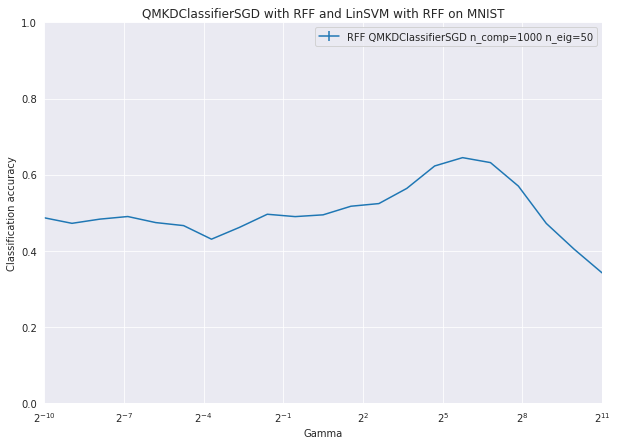

In [ ]:
# plot the results:
plt.figure(figsize=(10, 7))
plt.errorbar(sample_sizes, ave_qmkdc_sgd_scores, yerr=std_qmkdc_sgd_scores, label=f"RFF QMKDClassifierSGD n_comp={num_comp} n_eig={num_eig}")
#plt.errorbar(sample_sizes, ave_linear_rff_scores, yerr=std_linear_rff_scores, label=f"RFF LinearSVM n_comp={num_comp}")

# legends and labels
# plt.title("QMDensitySGD, QMKDClassifierSGD and LinSVM with RFF on MNIST")
plt.title("QMKDClassifierSGD with RFF with RFF on Trip Advisor Hotel Reviews")
plt.xlim(sample_sizes[0], sample_sizes[-1])
plt.ylim(np.min(mixed_scores), 1)
plt.xlabel("Gamma")
plt.ylabel("Classification accuracy")
plt.legend(loc='best')
if log_plot == True:
  plt.semilogx(basex=2)
plt.show()

In [ ]:
'''
Modified version of https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_kernel_approximation.html#sphx-glr-auto-examples-miscellaneous-plot-kernel-approximation-py
'''
# Parameters 
num_comp = 1000
log_plot = True
num_exps = 1
num_eig = 50
num_epochs = 3
lr = 0.0025

# Interval of gamma points for tuning
if log_plot == True:
  #sample_sizes = np.logspace(-13, -1, num=13, base=2)
  sample_sizes = np.logspace(4, 11, num=9, base=2)
else:
  sample_sizes = 0.025 * onp.arange(2, 31)

# sample_sizes = np.array([2**(-8)]) # Uncomment this in case you want only one gamma

# Create numpy arrays to keep track of data
num_points = sample_sizes.shape[0]
mixed_scores = np.zeros((num_points, num_exps))
qmkdc_sgd_scores = np.zeros((num_points, num_exps))
#linear_rff_scores = np.zeros((num_points, num_exps))

# num_exps is the number of experiments for each point
for i in range(num_exps):
  # Start the training on the samples
  #exp_time = time()
  for j in range(num_points):  
      exp_time = time()

      #'''
      #### Lin SVM #############
      # feature_map_fourier = RBFSampler(gamma=sample_sizes[j], random_state=(i+1), n_components=num_comp)
      # X_ff_train = feature_map_fourier.fit_transform(X_train)
      # X_ff_train = X_ff_train/(np.linalg.norm(X_ff_train,axis=1)).reshape(-1,1)
      # X_ff_test = feature_map_fourier.transform(X_test)
      # X_ff_test = X_ff_test/(np.linalg.norm(X_ff_test,axis=1)).reshape(-1,1)
      # # train linear svm over RFF map
      # linear_rff_svm = svm.LinearSVC()
      # linear_rff_svm.fit(X_ff_train, y_train.ravel())
      # # Predict and save the value
      # linear_rff_scores[j,i] = linear_rff_svm.score(X_ff_test, y_test.ravel())
      # print("--------time LinSVM---------------")
      # print(time() - exp_time)
      # exp_time = time()
      #'''

      #### QMKDCsgd ##############
      qmkdc1_dig = models.QMKDClassifierSGD(input_dim=100, dim_x=num_comp, num_classes=4, num_eig=num_eig, gamma=sample_sizes[j], random_state=(i+1))
      optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
      qmkdc1_dig.compile(optimizer, loss=tf.keras.losses.CategoricalCrossentropy())
      y_train_bin = tf.reshape(tf.keras.backend.one_hot(y_train, 4), (-1,4))
      qmkdc1_dig.fit(X_train, y_train_bin, epochs=num_epochs)
      # history = qmkdc1_dig.fit(X_train, y_train_bin, epochs=num_epochs)  # Uncomment this if you want to plot loss and acc of last training
      out = qmkdc1_dig.predict(X_test)
      qmkdc_sgd_scores[j,i] = accuracy_score(y_test, np.argmax(out, axis=1))
      del qmkdc1_dig
      gc.collect()
      print("--------time QMKDCsgd---------------")
      print(time() - exp_time)
  #print(time() - exp_time)

# Save the average accuracies and standard deviations in three lists
ave_qmkdc_sgd_scores = qmkdc_sgd_scores.mean(axis=1).tolist()
# ave_linear_rff_scores = linear_rff_scores.mean(axis=1).tolist()
std_qmkdc_sgd_scores = qmkdc_sgd_scores.std(axis=1).tolist()
# std_linear_rff_scores = linear_rff_scores.std(axis=1).tolist()

Epoch 1/3
1132/1132 [==============================] - 4s 4ms/step - loss: 0.6920
Epoch 2/3
1132/1132 [==============================] - 4s 4ms/step - loss: 0.6018
Epoch 3/3
1132/1132 [==============================] - 4s 4ms/step - loss: 0.5491
--------time QMKDCsgd---------------
14.867408990859985
Epoch 1/3
1132/1132 [==============================] - 4s 4ms/step - loss: 0.6644
Epoch 2/3
1132/1132 [==============================] - 4s 4ms/step - loss: 0.5334
Epoch 3/3
1132/1132 [==============================] - 4s 4ms/step - loss: 0.4753
--------time QMKDCsgd---------------
14.824714660644531
Epoch 1/3
1132/1132 [==============================] - 4s 4ms/step - loss: 0.6686
Epoch 2/3
1132/1132 [==============================] - 4s 4ms/step - loss: 0.5058
Epoch 3/3
1132/1132 [==============================] - 4s 4ms/step - loss: 0.4569
--------time QMKDCsgd---------------
14.771422386169434
Epoch 1/3
1132/1132 [==============================] - 4s 4ms/step - loss: 0.7452
Epoch 2/3
11

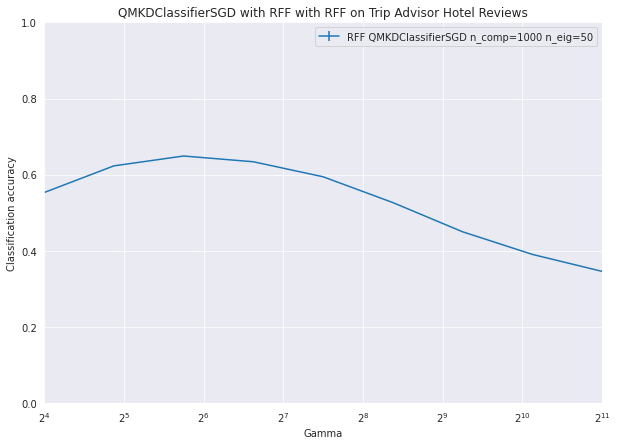

In [ ]:
# plot the results:
plt.figure(figsize=(10, 7))
plt.errorbar(sample_sizes, ave_qmkdc_sgd_scores, yerr=std_qmkdc_sgd_scores, label=f"RFF QMKDClassifierSGD n_comp={num_comp} n_eig={num_eig}")
#plt.errorbar(sample_sizes, ave_linear_rff_scores, yerr=std_linear_rff_scores, label=f"RFF LinearSVM n_comp={num_comp}")

# legends and labels
# plt.title("QMDensitySGD, QMKDClassifierSGD and LinSVM with RFF on MNIST")
plt.title("QMKDClassifierSGD with RFF with RFF on Trip Advisor Hotel Reviews")
plt.xlim(sample_sizes[0], sample_sizes[-1])
plt.ylim(np.min(mixed_scores), 1)
plt.xlabel("Gamma")
plt.ylabel("Classification accuracy")
plt.legend(loc='best')
if log_plot == True:
  plt.semilogx(basex=2)
plt.show()

In [ ]:
'''
Modified version of https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_kernel_approximation.html#sphx-glr-auto-examples-miscellaneous-plot-kernel-approximation-py
'''
# Parameters 
num_comp = 1000
log_plot = True
num_exps = 1
num_eig = 50
num_epochs = 3
lr = 0.0025

# Interval of gamma points for tuning
if log_plot == True:
  #sample_sizes = np.logspace(-13, -1, num=13, base=2)
  sample_sizes = np.logspace(-2, 4, num=6, base=10)
else:
  sample_sizes = 0.025 * onp.arange(2, 31)

# sample_sizes = np.array([2**(-8)]) # Uncomment this in case you want only one gamma

# Create numpy arrays to keep track of data
num_points = sample_sizes.shape[0]
mixed_scores = np.zeros((num_points, num_exps))
qmkdc_sgd_scores = np.zeros((num_points, num_exps))
#linear_rff_scores = np.zeros((num_points, num_exps))

# num_exps is the number of experiments for each point
for i in range(num_exps):
  # Start the training on the samples
  #exp_time = time()
  for j in range(num_points):  
      exp_time = time()

      #'''
      #### Lin SVM #############
      # feature_map_fourier = RBFSampler(gamma=sample_sizes[j], random_state=(i+1), n_components=num_comp)
      # X_ff_train = feature_map_fourier.fit_transform(X_train)
      # X_ff_train = X_ff_train/(np.linalg.norm(X_ff_train,axis=1)).reshape(-1,1)
      # X_ff_test = feature_map_fourier.transform(X_test)
      # X_ff_test = X_ff_test/(np.linalg.norm(X_ff_test,axis=1)).reshape(-1,1)
      # # train linear svm over RFF map
      # linear_rff_svm = svm.LinearSVC()
      # linear_rff_svm.fit(X_ff_train, y_train.ravel())
      # # Predict and save the value
      # linear_rff_scores[j,i] = linear_rff_svm.score(X_ff_test, y_test.ravel())
      # print("--------time LinSVM---------------")
      # print(time() - exp_time)
      # exp_time = time()
      #'''

      #### QMKDCsgd ##############
      qmkdc1_dig = models.QMKDClassifierSGD(input_dim=100, dim_x=num_comp, num_classes=4, num_eig=num_eig, gamma=sample_sizes[j], random_state=(i+1))
      optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
      qmkdc1_dig.compile(optimizer, loss=tf.keras.losses.CategoricalCrossentropy())
      y_train_bin = tf.reshape(tf.keras.backend.one_hot(y_train, 4), (-1,4))
      qmkdc1_dig.fit(X_train, y_train_bin, epochs=num_epochs)
      # history = qmkdc1_dig.fit(X_train, y_train_bin, epochs=num_epochs)  # Uncomment this if you want to plot loss and acc of last training
      out = qmkdc1_dig.predict(X_test)
      qmkdc_sgd_scores[j,i] = accuracy_score(y_test, np.argmax(out, axis=1))
      del qmkdc1_dig
      gc.collect()
      print("--------time QMKDCsgd---------------")
      print(time() - exp_time)
  #print(time() - exp_time)

# Save the average accuracies and standard deviations in three lists
ave_qmkdc_sgd_scores = qmkdc_sgd_scores.mean(axis=1).tolist()
# ave_linear_rff_scores = linear_rff_scores.mean(axis=1).tolist()
std_qmkdc_sgd_scores = qmkdc_sgd_scores.std(axis=1).tolist()
# std_linear_rff_scores = linear_rff_scores.std(axis=1).tolist()

Epoch 1/3
1132/1132 [==============================] - 4s 4ms/step - loss: 0.8441
Epoch 2/3
1132/1132 [==============================] - 4s 4ms/step - loss: 0.7588
Epoch 3/3
1132/1132 [==============================] - 4s 4ms/step - loss: 0.7457
--------time QMKDCsgd---------------
15.070761442184448
Epoch 1/3
1132/1132 [==============================] - 4s 4ms/step - loss: 0.8034
Epoch 2/3
1132/1132 [==============================] - 4s 4ms/step - loss: 0.7394
Epoch 3/3
1132/1132 [==============================] - 4s 4ms/step - loss: 0.7254
--------time QMKDCsgd---------------
14.989478826522827
Epoch 1/3
1132/1132 [==============================] - 4s 4ms/step - loss: 0.7506
Epoch 2/3
1132/1132 [==============================] - 4s 4ms/step - loss: 0.7001
Epoch 3/3
1132/1132 [==============================] - 4s 4ms/step - loss: 0.6797
--------time QMKDCsgd---------------
15.076785326004028
Epoch 1/3
1132/1132 [==============================] - 4s 4ms/step - loss: 0.6554
Epoch 2/3
11

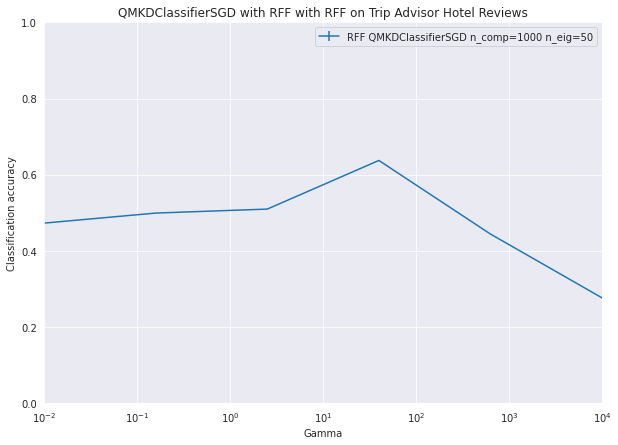

In [ ]:
# plot the results:
plt.figure(figsize=(10, 7))
plt.errorbar(sample_sizes, ave_qmkdc_sgd_scores, yerr=std_qmkdc_sgd_scores, label=f"RFF QMKDClassifierSGD n_comp={num_comp} n_eig={num_eig}")
#plt.errorbar(sample_sizes, ave_linear_rff_scores, yerr=std_linear_rff_scores, label=f"RFF LinearSVM n_comp={num_comp}")

# legends and labels
# plt.title("QMDensitySGD, QMKDClassifierSGD and LinSVM with RFF on MNIST")
plt.title("QMKDClassifierSGD with RFF with RFF on Trip Advisor Hotel Reviews")
plt.xlim(sample_sizes[0], sample_sizes[-1])
plt.ylim(np.min(mixed_scores), 1)
plt.xlabel("Gamma")
plt.ylabel("Classification accuracy")
plt.legend(loc='best')
if log_plot == True:
  plt.semilogx(basex=10)
plt.show()

In [ ]:
'''
Modified version of https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_kernel_approximation.html#sphx-glr-auto-examples-miscellaneous-plot-kernel-approximation-py
'''
# Parameters 
num_comp = 1000
log_plot = True
num_exps = 1
num_eig = 50
num_epochs = 3
lr = 0.0025

# Interval of gamma points for tuning
if log_plot == True:
  #sample_sizes = np.logspace(-13, -1, num=13, base=2)
  sample_sizes = np.logspace(5, 9, num=10, base=2)
else:
  sample_sizes = 0.025 * onp.arange(2, 31)

# sample_sizes = np.array([2**(-8)]) # Uncomment this in case you want only one gamma

# Create numpy arrays to keep track of data
num_points = sample_sizes.shape[0]
mixed_scores = np.zeros((num_points, num_exps))
qmkdc_sgd_scores = np.zeros((num_points, num_exps))
#linear_rff_scores = np.zeros((num_points, num_exps))

# num_exps is the number of experiments for each point
for i in range(num_exps):
  # Start the training on the samples
  #exp_time = time()
  for j in range(num_points):  
      exp_time = time()

      #'''
      #### Lin SVM #############
      # feature_map_fourier = RBFSampler(gamma=sample_sizes[j], random_state=(i+1), n_components=num_comp)
      # X_ff_train = feature_map_fourier.fit_transform(X_train)
      # X_ff_train = X_ff_train/(np.linalg.norm(X_ff_train,axis=1)).reshape(-1,1)
      # X_ff_test = feature_map_fourier.transform(X_test)
      # X_ff_test = X_ff_test/(np.linalg.norm(X_ff_test,axis=1)).reshape(-1,1)
      # # train linear svm over RFF map
      # linear_rff_svm = svm.LinearSVC()
      # linear_rff_svm.fit(X_ff_train, y_train.ravel())
      # # Predict and save the value
      # linear_rff_scores[j,i] = linear_rff_svm.score(X_ff_test, y_test.ravel())
      # print("--------time LinSVM---------------")
      # print(time() - exp_time)
      # exp_time = time()
      #'''

      #### QMKDCsgd ##############
      qmkdc1_dig = models.QMKDClassifierSGD(input_dim=100, dim_x=num_comp, num_classes=4, num_eig=num_eig, gamma=sample_sizes[j], random_state=(i+1))
      optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
      qmkdc1_dig.compile(optimizer, loss=tf.keras.losses.CategoricalCrossentropy())
      y_train_bin = tf.reshape(tf.keras.backend.one_hot(y_train, 4), (-1,4))
      qmkdc1_dig.fit(X_train, y_train_bin, epochs=num_epochs)
      # history = qmkdc1_dig.fit(X_train, y_train_bin, epochs=num_epochs)  # Uncomment this if you want to plot loss and acc of last training
      out = qmkdc1_dig.predict(X_test)
      qmkdc_sgd_scores[j,i] = accuracy_score(y_test, np.argmax(out, axis=1))
      del qmkdc1_dig
      gc.collect()
      print("--------time QMKDCsgd---------------")
      print(time() - exp_time)
  #print(time() - exp_time)

# Save the average accuracies and standard deviations in three lists
ave_qmkdc_sgd_scores = qmkdc_sgd_scores.mean(axis=1).tolist()
# ave_linear_rff_scores = linear_rff_scores.mean(axis=1).tolist()
std_qmkdc_sgd_scores = qmkdc_sgd_scores.std(axis=1).tolist()
# std_linear_rff_scores = linear_rff_scores.std(axis=1).tolist()

Epoch 1/3
1132/1132 [==============================] - 4s 4ms/step - loss: 0.6621
Epoch 2/3
1132/1132 [==============================] - 4s 4ms/step - loss: 0.5251
Epoch 3/3
1132/1132 [==============================] - 5s 4ms/step - loss: 0.4680
--------time QMKDCsgd---------------
15.114065647125244
Epoch 1/3
1132/1132 [==============================] - 4s 4ms/step - loss: 0.6546
Epoch 2/3
1132/1132 [==============================] - 5s 4ms/step - loss: 0.5034
Epoch 3/3
1132/1132 [==============================] - 4s 4ms/step - loss: 0.4535
--------time QMKDCsgd---------------
15.109029769897461
Epoch 1/3
1132/1132 [==============================] - 4s 4ms/step - loss: 0.6741
Epoch 2/3
1132/1132 [==============================] - 4s 4ms/step - loss: 0.5089
Epoch 3/3
1132/1132 [==============================] - 4s 4ms/step - loss: 0.4625
--------time QMKDCsgd---------------
15.074975490570068
Epoch 1/3
1132/1132 [==============================] - 5s 4ms/step - loss: 0.7158
Epoch 2/3
11

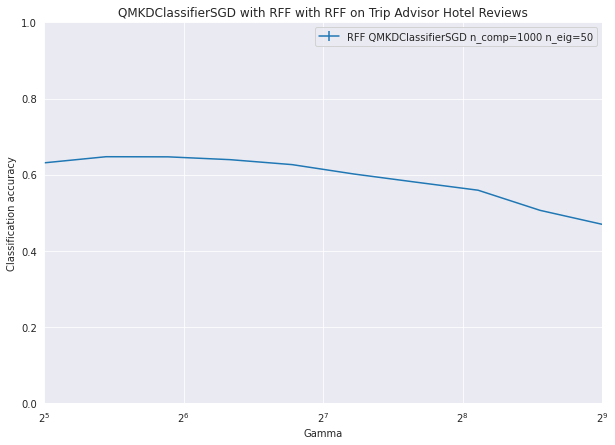

In [ ]:
# plot the results:
plt.figure(figsize=(10, 7))
plt.errorbar(sample_sizes, ave_qmkdc_sgd_scores, yerr=std_qmkdc_sgd_scores, label=f"RFF QMKDClassifierSGD n_comp={num_comp} n_eig={num_eig}")
#plt.errorbar(sample_sizes, ave_linear_rff_scores, yerr=std_linear_rff_scores, label=f"RFF LinearSVM n_comp={num_comp}")

# legends and labels
# plt.title("QMDensitySGD, QMKDClassifierSGD and LinSVM with RFF on MNIST")
plt.title("QMKDClassifierSGD with RFF with RFF on Trip Advisor Hotel Reviews")
plt.xlim(sample_sizes[0], sample_sizes[-1])
plt.ylim(np.min(mixed_scores), 1)
plt.xlabel("Gamma")
plt.ylabel("Classification accuracy")
plt.legend(loc='best')
if log_plot == True:
  plt.semilogx(basex=2)
plt.show()

In [ ]:
'''
Modified version of https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_kernel_approximation.html#sphx-glr-auto-examples-miscellaneous-plot-kernel-approximation-py
'''
# Parameters 
num_comp = 1000
log_plot = True
num_exps = 1
num_eig = 50
num_epochs = 3
lr = 0.0025

# Interval of gamma points for tuning
if log_plot == True:
  #sample_sizes = np.logspace(-13, -1, num=13, base=2)
  sample_sizes = np.logspace(2, 11, num=10, base=2)
else:
  sample_sizes = 0.025 * onp.arange(2, 31)

# sample_sizes = np.array([2**(-8)]) # Uncomment this in case you want only one gamma

# Create numpy arrays to keep track of data
num_points = sample_sizes.shape[0]
mixed_scores = np.zeros((num_points, num_exps))
qmkdc_sgd_scores = np.zeros((num_points, num_exps))
#linear_rff_scores = np.zeros((num_points, num_exps))

# num_exps is the number of experiments for each point
for i in range(num_exps):
  # Start the training on the samples
  #exp_time = time()
  for j in range(num_points):  
      exp_time = time()

      #'''
      #### Lin SVM #############
      # feature_map_fourier = RBFSampler(gamma=sample_sizes[j], random_state=(i+1), n_components=num_comp)
      # X_ff_train = feature_map_fourier.fit_transform(X_train)
      # X_ff_train = X_ff_train/(np.linalg.norm(X_ff_train,axis=1)).reshape(-1,1)
      # X_ff_test = feature_map_fourier.transform(X_test)
      # X_ff_test = X_ff_test/(np.linalg.norm(X_ff_test,axis=1)).reshape(-1,1)
      # # train linear svm over RFF map
      # linear_rff_svm = svm.LinearSVC()
      # linear_rff_svm.fit(X_ff_train, y_train.ravel())
      # # Predict and save the value
      # linear_rff_scores[j,i] = linear_rff_svm.score(X_ff_test, y_test.ravel())
      # print("--------time LinSVM---------------")
      # print(time() - exp_time)
      # exp_time = time()
      #'''

      #### QMKDCsgd ##############
      qmkdc1_dig = models.QMKDClassifierSGD(input_dim=100, dim_x=num_comp, num_classes=4, num_eig=num_eig, gamma=sample_sizes[j], random_state=(i+1))
      optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
      qmkdc1_dig.compile(optimizer, loss=tf.keras.losses.CategoricalCrossentropy())
      y_train_bin = tf.reshape(tf.keras.backend.one_hot(y_train, 4), (-1,4))
      qmkdc1_dig.fit(X_train, y_train_bin, epochs=num_epochs)
      # history = qmkdc1_dig.fit(X_train, y_train_bin, epochs=num_epochs)  # Uncomment this if you want to plot loss and acc of last training
      out = qmkdc1_dig.predict(X_test)
      qmkdc_sgd_scores[j,i] = accuracy_score(y_test, np.argmax(out, axis=1))
      del qmkdc1_dig
      gc.collect()
      print("--------time QMKDCsgd---------------")
      print(time() - exp_time)
  #print(time() - exp_time)

# Save the average accuracies and standard deviations in three lists
ave_qmkdc_sgd_scores = qmkdc_sgd_scores.mean(axis=1).tolist()
# ave_linear_rff_scores = linear_rff_scores.mean(axis=1).tolist()
std_qmkdc_sgd_scores = qmkdc_sgd_scores.std(axis=1).tolist()
# std_linear_rff_scores = linear_rff_scores.std(axis=1).tolist()

Epoch 1/3
1132/1132 [==============================] - 4s 4ms/step - loss: 0.7446
Epoch 2/3
1132/1132 [==============================] - 4s 4ms/step - loss: 0.6868
Epoch 3/3
1132/1132 [==============================] - 4s 4ms/step - loss: 0.6639
--------time QMKDCsgd---------------
15.099749326705933
Epoch 1/3
1132/1132 [==============================] - 4s 4ms/step - loss: 0.7195
Epoch 2/3
1132/1132 [==============================] - 5s 4ms/step - loss: 0.6538
Epoch 3/3
1132/1132 [==============================] - 5s 4ms/step - loss: 0.6221
--------time QMKDCsgd---------------
15.254241228103638
Epoch 1/3
1132/1132 [==============================] - 5s 4ms/step - loss: 0.6916
Epoch 2/3
1132/1132 [==============================] - 4s 4ms/step - loss: 0.5984
Epoch 3/3
1132/1132 [==============================] - 5s 4ms/step - loss: 0.5477
--------time QMKDCsgd---------------
15.233581066131592
Epoch 1/3
1132/1132 [==============================] - 4s 4ms/step - loss: 0.6611
Epoch 2/3
11

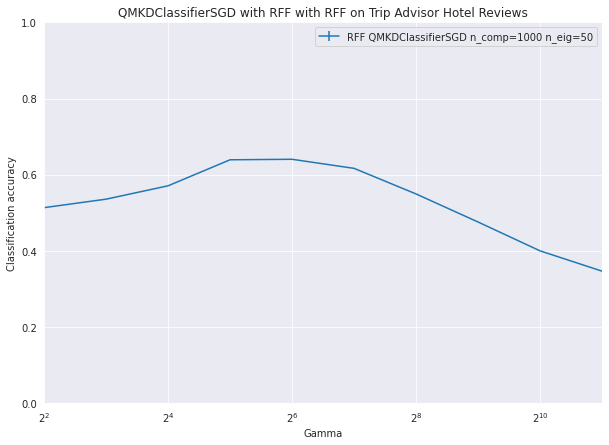

In [ ]:
# plot the results:
plt.figure(figsize=(10, 7))
plt.errorbar(sample_sizes, ave_qmkdc_sgd_scores, yerr=std_qmkdc_sgd_scores, label=f"RFF QMKDClassifierSGD n_comp={num_comp} n_eig={num_eig}")
#plt.errorbar(sample_sizes, ave_linear_rff_scores, yerr=std_linear_rff_scores, label=f"RFF LinearSVM n_comp={num_comp}")

# legends and labels
# plt.title("QMDensitySGD, QMKDClassifierSGD and LinSVM with RFF on MNIST")
plt.title("QMKDClassifierSGD with RFF with RFF on Trip Advisor Hotel Reviews")
plt.xlim(sample_sizes[0], sample_sizes[-1])
plt.ylim(np.min(mixed_scores), 1)
plt.xlabel("Gamma")
plt.ylabel("Classification accuracy")
plt.legend(loc='best')
if log_plot == True:
  plt.semilogx(basex=2)
plt.show()

In [ ]:
import numpy as np

In [ ]:
set_gamma_a =  np.logspace(2, 11, num=10, base=2).tolist()
# set_lr_b = [0.00005, 0.0005, 0.5, 10]
# set_lr_c = [0.000005, 0.00005, 1, 10]
# set_lr_d = [0.0005, 0.005, 0.05, 0.5, 1, 10]
# set_lr_e = [0.0005, 0.0025, 0.005]

for gamma in set_gamma_a:
  exp_time = time()
  qmkdc1_dig = models.QMKDClassifierSGD(input_dim=100, dim_x=1000, num_classes=4, num_eig=50, gamma=gamma, random_state=17)
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.0025)
  qmkdc1_dig.compile(optimizer, loss=tf.keras.losses.CategoricalCrossentropy())
  y_train_bin = tf.reshape(tf.keras.backend.one_hot(y_train, 4), (-1,4))
  qmkdc1_dig.fit(X_train, y_train_bin, epochs=10)
  out = qmkdc1_dig.predict(X_test)
  print(f'gamma = {gamma}')
  print(f'acc = {accuracy_score(y_test, np.argmax(out, axis=1))}')
  print("--------time QMKDCsgd---------------")
  print(time() - exp_time)

Epoch 1/10
1132/1132 [==============================] - 4s 4ms/step - loss: 0.7417
Epoch 2/10
1132/1132 [==============================] - 5s 4ms/step - loss: 0.6885
Epoch 3/10
1132/1132 [==============================] - 5s 4ms/step - loss: 0.6678
Epoch 4/10
1132/1132 [==============================] - 5s 4ms/step - loss: 0.6506
Epoch 5/10
1132/1132 [==============================] - 5s 4ms/step - loss: 0.6373
Epoch 6/10
1132/1132 [==============================] - 5s 4ms/step - loss: 0.6255
Epoch 7/10
1132/1132 [==============================] - 5s 4ms/step - loss: 0.6155
Epoch 8/10
1132/1132 [==============================] - 5s 4ms/step - loss: 0.6068
Epoch 9/10
1132/1132 [==============================] - 5s 4ms/step - loss: 0.5986
Epoch 10/10
1132/1132 [==============================] - 5s 4ms/step - loss: 0.5906
lr = 4.0
acc = 0.5466092334879611
--------time QMKDCsgd---------------
47.8021981716156
Epoch 1/10
1132/1132 [==============================] - 5s 4ms/step - loss: 0.723

In [ ]:
set_gamma_a =  np.logspace(2, 11, num=10, base=2).tolist()
# set_lr_b = [0.00005, 0.0005, 0.5, 10]
# set_lr_c = [0.000005, 0.00005, 1, 10]
# set_lr_d = [0.0005, 0.005, 0.05, 0.5, 1, 10]
# set_lr_e = [0.0005, 0.0025, 0.005]

for gamma in set_gamma_a:
  exp_time = time()
  qmkdc1_dig = models.QMKDClassifierSGD(input_dim=100, dim_x=1000, num_classes=4, num_eig=50, gamma=gamma, random_state=17)
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.0025)
  qmkdc1_dig.compile(optimizer, loss=tf.keras.losses.CategoricalCrossentropy())
  y_train_bin = tf.reshape(tf.keras.backend.one_hot(y_train, 4), (-1,4))
  qmkdc1_dig.fit(X_train, y_train_bin, epochs=10)
  out = qmkdc1_dig.predict(X_test)
  print(f'gamma = {gamma}')
  print(f'acc = {accuracy_score(y_test, np.argmax(out, axis=1))}')
  print("--------time QMKDCsgd---------------")
  print(time() - exp_time)

Epoch 1/10
1132/1132 [==============================] - 4s 4ms/step - loss: 0.7420
Epoch 2/10
1132/1132 [==============================] - 4s 4ms/step - loss: 0.6849
Epoch 3/10
1132/1132 [==============================] - 5s 4ms/step - loss: 0.6660
Epoch 4/10
1132/1132 [==============================] - 4s 4ms/step - loss: 0.6475
Epoch 5/10
1132/1132 [==============================] - 4s 4ms/step - loss: 0.6367
Epoch 6/10
1132/1132 [==============================] - 4s 4ms/step - loss: 0.6261
Epoch 7/10
1132/1132 [==============================] - 4s 4ms/step - loss: 0.6166
Epoch 8/10
1132/1132 [==============================] - 4s 4ms/step - loss: 0.6051
Epoch 9/10
1132/1132 [==============================] - 5s 4ms/step - loss: 0.5980
Epoch 10/10
1132/1132 [==============================] - 4s 4ms/step - loss: 0.5906
gamma = 4.0
acc = 0.5532361387232163
--------time QMKDCsgd---------------
52.60134768486023
Epoch 1/10
1132/1132 [==============================] - 4s 4ms/step - loss: 0

In [ ]:
set_gamma_a =  np.logspace(0, 11, num=10, base=2).tolist()
# set_lr_b = [0.00005, 0.0005, 0.5, 10]
# set_lr_c = [0.000005, 0.00005, 1, 10]
# set_lr_d = [0.0005, 0.005, 0.05, 0.5, 1, 10]
# set_lr_e = [0.0005, 0.0025, 0.005]

for gamma in set_gamma_a:
  exp_time = time()
  qmkdc1_dig = models.QMKDClassifierSGD(input_dim=100, dim_x=5000, num_classes=4, num_eig=50, gamma=gamma, random_state=0)
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.000005)
  qmkdc1_dig.compile(optimizer, loss=tf.keras.losses.CategoricalCrossentropy())
  y_train_bin = tf.reshape(tf.keras.backend.one_hot(y_train, 4), (-1,4))
  qmkdc1_dig.fit(X_train, y_train_bin, epochs=100)
  out = qmkdc1_dig.predict(X_test)
  print(f'gamma = {gamma}')
  print(f'acc = {accuracy_score(y_test, np.argmax(out, axis=1))}')
  print("--------time QMKDCsgd---------------")
  print(time() - exp_time)

Epoch 1/100
1132/1132 [==============================] - 4s 4ms/step - loss: 0.9583
Epoch 2/100
1132/1132 [==============================] - 4s 4ms/step - loss: 0.8266
Epoch 3/100
1132/1132 [==============================] - 5s 4ms/step - loss: 0.7988
Epoch 4/100
1132/1132 [==============================] - 5s 4ms/step - loss: 0.7819
Epoch 5/100
1132/1132 [==============================] - 4s 4ms/step - loss: 0.7697
Epoch 6/100
1132/1132 [==============================] - 4s 4ms/step - loss: 0.7605
Epoch 7/100
1132/1132 [==============================] - 4s 4ms/step - loss: 0.7526
Epoch 8/100
1132/1132 [==============================] - 4s 4ms/step - loss: 0.7461
Epoch 9/100
1132/1132 [==============================] - 4s 4ms/step - loss: 0.7409
Epoch 10/100
1132/1132 [==============================] - 4s 4ms/step - loss: 0.7364
Epoch 11/100
1132/1132 [==============================] - 4s 4ms/step - loss: 0.7323
Epoch 12/100
1132/1132 [==============================] - 4s 4ms/step - lo

In [ ]:
#set_gamma_a =  np.logspace(0, 11, num=10, base=2).tolist()
set_dim_x = [1000, 2000, 3000, 4000, 5000]
# set_lr_b = [0.00005, 0.0005, 0.5, 10]
# set_lr_c = [0.000005, 0.00005, 1, 10]
# set_lr_d = [0.0005, 0.005, 0.05, 0.5, 1, 10]
# set_lr_e = [0.0005, 0.0025, 0.005]

for dimm in set_dim_x:
  exp_time = time()
  qmkdc1_dig = models.QMKDClassifierSGD(input_dim=100, dim_x=dimm, num_classes=4, num_eig=50, gamma=2**0, random_state=0)
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.000005, beta_1=0.9, beta_2=0.999, decay=1e-9)
  qmkdc1_dig.compile(optimizer, loss=tf.keras.losses.CategoricalCrossentropy())
  y_train_bin = tf.reshape(tf.keras.backend.one_hot(y_train, 4), (-1,4))
  qmkdc1_dig.fit(X_train, y_train_bin, epochs=20)
  out = qmkdc1_dig.predict(X_test)
  print(f'dim_x = {dimm}')
  print(f'acc = {accuracy_score(y_test, np.argmax(out, axis=1))}')
  print("--------time QMKDCsgd---------------")
  print(time() - exp_time)

Epoch 1/20
1132/1132 [==============================] - 4s 4ms/step - loss: 1.0411
Epoch 2/20
1132/1132 [==============================] - 4s 4ms/step - loss: 0.8982
Epoch 3/20
1132/1132 [==============================] - 4s 4ms/step - loss: 0.8415
Epoch 4/20
1132/1132 [==============================] - 4s 4ms/step - loss: 0.8235
Epoch 5/20
1132/1132 [==============================] - 5s 4ms/step - loss: 0.8108
Epoch 6/20
1132/1132 [==============================] - 4s 4ms/step - loss: 0.8008
Epoch 7/20
1132/1132 [==============================] - 4s 4ms/step - loss: 0.7924
Epoch 8/20
1132/1132 [==============================] - 4s 4ms/step - loss: 0.7853
Epoch 9/20
1132/1132 [==============================] - 4s 4ms/step - loss: 0.7789
Epoch 10/20
1132/1132 [==============================] - 4s 4ms/step - loss: 0.7731
Epoch 11/20
1132/1132 [==============================] - 4s 4ms/step - loss: 0.7684
Epoch 12/20
1132/1132 [==============================] - 4s 4ms/step - loss: 0.7641
E

###1. random_state=None, num_classes=5, lr=5e-07, input_dim=100, gamma=4, eig_percentage=0.25, decay=0, component_dim=1000

In [ ]:
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint

In [ ]:
import os
import keras
from sklearn.metrics import make_scorer

In [ ]:
input_dim = X_train.shape[1]
num_classes = np.unique(y_train).shape[0]
gammas = 4
learning_rate= 5e-7
component_dim= 1000
num_eigs= 0.25
epochs = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
decay = 0
Acc_3 = []

num_eig = round(num_eigs * component_dim)

fm_x = layers.QFeatureMapRFF(input_dim=100, dim=component_dim, gamma=gammas, random_state=0)
#qmkdc
qmkdc = models.QMKDClassifier(fm_x=fm_x, dim_x=component_dim, num_classes=num_classes)
qmkdc.compile()
qmkdc.fit(X_train, y_train, epochs=1, batch_size = 256, verbose = 20)

#qmkdc SGD
qmkdc2 = models.QMKDClassifierSGD(input_dim=100, dim_x=component_dim, num_classes=num_classes, num_eig=num_eig, gamma=gammas, random_state=0)
qmkdc2.set_rhos(qmkdc.get_rhos())

#Train model with SGD
qmkdc2.layers[0].trainable = False
optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate, beta_1=0.9, beta_2=0.999, decay = decay)


qmkdc2.compile(optimizer= optimizer, loss = tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
qmkdc2.set_rhos(qmkdc.get_rhos())

y_train_bin = tf.reshape(tf.keras.backend.one_hot(y_train, num_classes), (-1,num_classes))
y_test_bin = tf.reshape(tf.keras.backend.one_hot(y_test, num_classes), (-1,num_classes))

checkpoint = ModelCheckpoint('/content/drive/MyDrive/Tesis_Maestria/Experiments/Experiment_2/result_2vrs/one_qmkdcsgd_true_1.h5', 
                            monitor='val_loss', 
                            verbose=1, 
                            save_best_only = True, 
                            mode='auto')
early_stop = EarlyStopping( monitor="val_loss",
                            min_delta=0,
                            patience=5,
                            verbose=1,
                            mode="auto",
                            restore_best_weights=True,
                            )
# for e in epochs:
#   qmkdc2.fit(X_train, y_train_bin, validation_split = 0.2, epochs=e, batch_size = 256, callbacks = [checkpoint, early_stop])
#   out = qmkdc2.predict(X_test)
#   y_pred = np.argmax(out, axis = 1).reshape(np.argmax(out, axis = 1).shape[0],1)
#   Result_3 = accuracy_score(y_test, y_pred)
#   Acc_3.append(Result_3)

# print(Acc_3)

history = qmkdc2.fit(X_train, y_train_bin, validation_split = 0.2, epochs=1000, batch_size = 256, callbacks = [checkpoint, early_stop])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

Epoch 1/1000
113/114 [============================>.] - ETA: 0s - loss: 1.5550 - accuracy: 0.4317
Epoch 00001: val_loss improved from inf to 1.55398, saving model to /content/drive/MyDrive/Tesis_Maestria/Experiments/Experiment_2/result_2vrs/one_qmkdcsgd_true_1.h5
114/114 [==============================] - 1s 9ms/step - loss: 1.5550 - accuracy: 0.4317 - val_loss: 1.5540 - val_accuracy: 0.4335
Epoch 2/1000
108/114 [===========================>..] - ETA: 0s - loss: 1.5546 - accuracy: 0.4467
Epoch 00002: val_loss improved from 1.55398 to 1.55347, saving model to /content/drive/MyDrive/Tesis_Maestria/Experiments/Experiment_2/result_2vrs/one_qmkdcsgd_true_1.h5
114/114 [==============================] - 1s 6ms/step - loss: 1.5545 - accuracy: 0.4476 - val_loss: 1.5535 - val_accuracy: 0.4504
Epoch 3/1000
110/114 [===========================>..] - ETA: 0s - loss: 1.5540 - accuracy: 0.4603
Epoch 00003: val_loss improved from 1.55347 to 1.55297, saving model to /content/drive/MyDrive/Tesis_Maestri

KeyboardInterrupt: ignored

In [ ]:
input_dim = X_train.shape[1]
num_classes = np.unique(y_train).shape[0]
gamma = 4
learning_rate= 5e-7
component_dim= 1000
eig_percentage= 0.25
epochs = 100
decay = 0
random_state = 0

num_eig = round(eig_percentage * component_dim)

opt = keras.optimizers.Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, decay=decay)

fm_x = layers.QFeatureMapRFF(input_dim, dim=component_dim, gamma=gamma, random_state=random_state)

qmkdc = models.QMKDClassifier(fm_x=fm_x, dim_x=component_dim, num_classes=num_classes)
qmkdc.compile()
qmkdc.fit(X_train, y_train, epochs=1, batch_size=256, verbose=20)

qmkdc1 = models.QMKDClassifierSGD(input_dim=input_dim, dim_x=component_dim, num_eig=num_eig,
                                  num_classes=num_classes, gamma=gamma, random_state=random_state, fm_x=fm_x)

qmkdc1.layers[0].trainable = False

qmkdc1.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=opt, metrics=['accuracy'])

qmkdc1.set_rhos(qmkdc.get_rhos())


TypeError: ignored

In [ ]:
# Tensorboard 
%load_ext tensorboard
%tensorboard --logdir "/content/drive/MyDrive/Tesis_Maestria/Experiments/Experiment_2/result_w2v"

In [ ]:
# Creation of the model without random search. It can be used to verify the initial performance of the model.
import datetime, os
logdir = os.path.join("/content/drive/MyDrive/Tesis_Maestria/Experiments/Experiment_2/result_w2v", "letters-" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

# model_mnist = create_model(input_dim, num_classes, component_dim=5000, gamma=2**0, lr=0.000005, decay=1e-9,
#                   random_state=None, eig_percentage=0.5, initialize_with_rff=True,
#                   type_of_rff="rff", fix_rff=False)

y_train_bin = tf.reshape(tf.keras.backend.one_hot(y_train, num_classes), (-1, num_classes))
y_test_bin = tf.reshape(tf.keras.backend.one_hot(y_test, num_classes), (-1, num_classes))
qmkdc1.fit(X_train, y_train_bin.numpy(), epochs=100, batch_size=256, validation_data=(X_test, y_test_bin.numpy()), 
            callbacks=[tensorboard_callback])